# MSiA 420 - Predictive Analytics II - Final Project
## Group 6: Alejandra Lelo de Larrea Ibarra, Kiran Jyothi Sheena, Lixuan (Ellen) Chen, Wencheng Zhang

# EDA on Individual Variables

In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns

## Data

In [2]:
# Read data 
data = pd.read_csv("../02_Data/hotel_bookings.csv")

# Dimensions 
print("Dimensions: " + str(data.shape))

# Print header 
data.head()

Dimensions: (119390, 32)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
# Check if there are NA's 
data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

There are missing values in *children, country, agent and company*. For *children* we can assume missings mean no children, for *country* we could create a "not stated" category, for *agent* its most likely that missings mean self-booked, *company* should be removed since missings represent 94\% of the data.

In [4]:
# Get summary statistics
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


<AxesSubplot:>

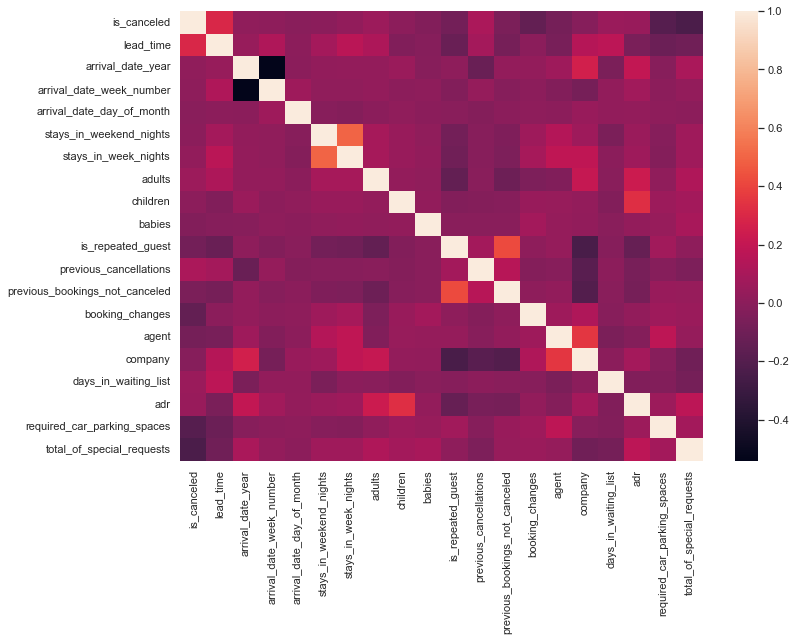

In [5]:
# Correlation plot 
corr = data.corr()
sns.set(rc = {'figure.figsize':(11.7, 8.27)})
sns.heatmap(corr)

Target variable is not strongly linearly correlated with predictors. The strongest correlations with *is_canceled* are *total_of_special_requests* (-0.23), *required_car_parking_spaces* (-0.19), *booking_changes* (-0.14), *previous_cancellations* (0.11).

In [6]:
# Correlation pair plot 
#sns.pairplot(data, hue = "is_canceled", palette = ['green', 'red'], markers = ["o", "D"])

## EDA - ALLI

### Country

In [7]:
# Unique values 
tbl_country = data.country.value_counts()
tbl_country

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

<AxesSubplot:title={'center':'Top 20 countries of origin'}>

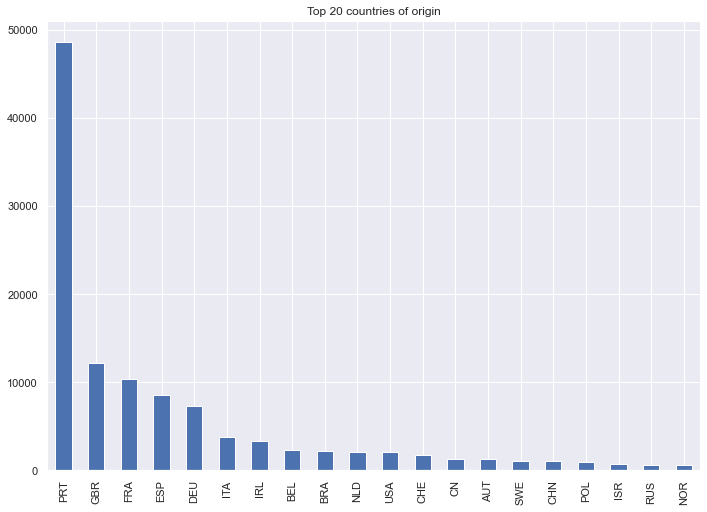

In [8]:
# Unique values 
tbl_country[0:20].plot(kind = "bar", title = "Top 20 countries of origin")

The majority of the customers come from Portugal. We could assume this is the country where the hotels are located and that most customers are nationals. 

In [9]:
# Missing values
data['country'].isna().sum()

488

For the missing values in countr, I propose to create a new category "Not stated". 

### is_canceled

In [10]:
data.is_canceled.value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

### Company

In [11]:
data.company.describe()

count    6797.000000
mean      189.266735
std       131.655015
min         6.000000
25%        62.000000
50%       179.000000
75%       270.000000
max       543.000000
Name: company, dtype: float64

In [12]:
data.company.isna().sum()

112593

Company is the ID of company/entity that made the booking or responsible for paying the booking. 96% are missing values. I suggest we drop this feature from the sample. 

### days_in_waiting_list

In [13]:
# Summary statistics
data.days_in_waiting_list.describe()

count    119390.000000
mean          2.321149
std          17.594721
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         391.000000
Name: days_in_waiting_list, dtype: float64

<AxesSubplot:ylabel='Frequency'>

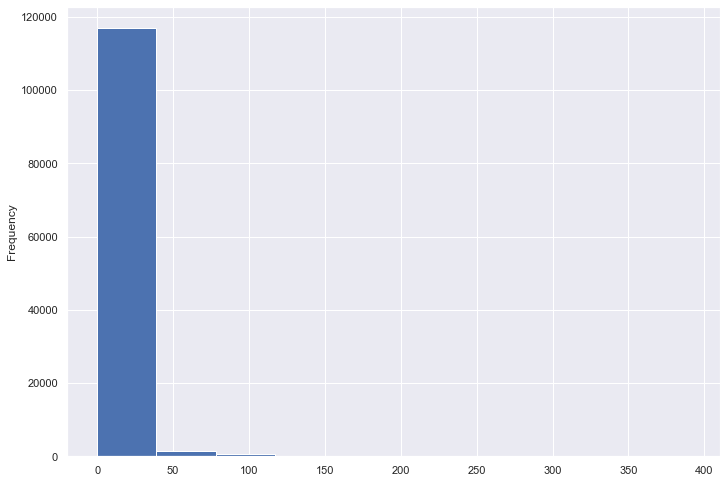

In [14]:
data.days_in_waiting_list.plot(kind = "hist")

<AxesSubplot:>

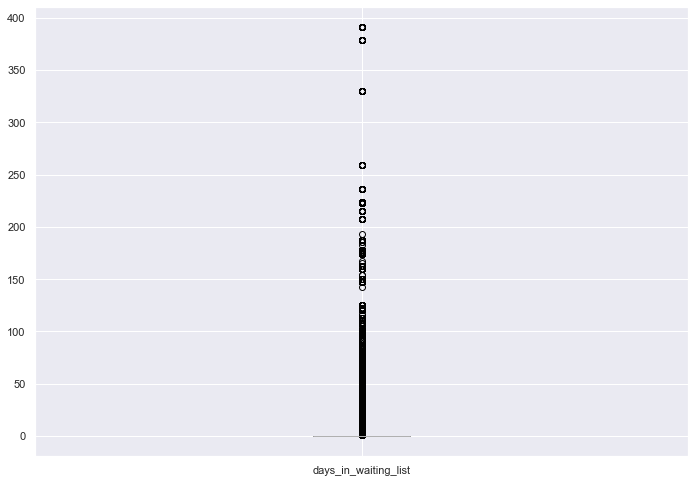

In [15]:
data.boxplot("days_in_waiting_list")

The maximum value of days in waiting list is 391, I think this couldbe an outlier since it is more htan one year. Lets see the unique values or this feature.

In [16]:
# Unique values 
np.sort(data.days_in_waiting_list.unique())

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  68,
        69,  70,  71,  72,  73,  74,  75,  76,  77,  79,  80,  81,  83,
        84,  85,  87,  89,  91,  92,  93,  96,  97,  98,  99, 100, 101,
       105, 107, 108, 109, 111, 113, 116, 117, 120, 121, 122, 125, 142,
       147, 150, 154, 160, 162, 165, 167, 174, 175, 176, 178, 183, 185,
       187, 193, 207, 215, 223, 224, 236, 259, 330, 379, 391])

In [17]:
# Possible outliers
len(data.days_in_waiting_list[data.days_in_waiting_list >= 150])

446

In [18]:
# Target variable for possible outliers
data.is_canceled[data.days_in_waiting_list>150].value_counts()

0    225
1    210
Name: is_canceled, dtype: int64

*days_in_waiting_list* is the numbr of days the booking was in the waiting list before it was confirmed to the customer. I would suggest to remove observations with a *days_in_waiting_list* greater than 150. They account for 0.2\% of the data and for the class of interest (canceled) just 0.4\%.

### Customer type

In [19]:
# Missing values 
data.customer_type.isna().sum()

0

<AxesSubplot:>

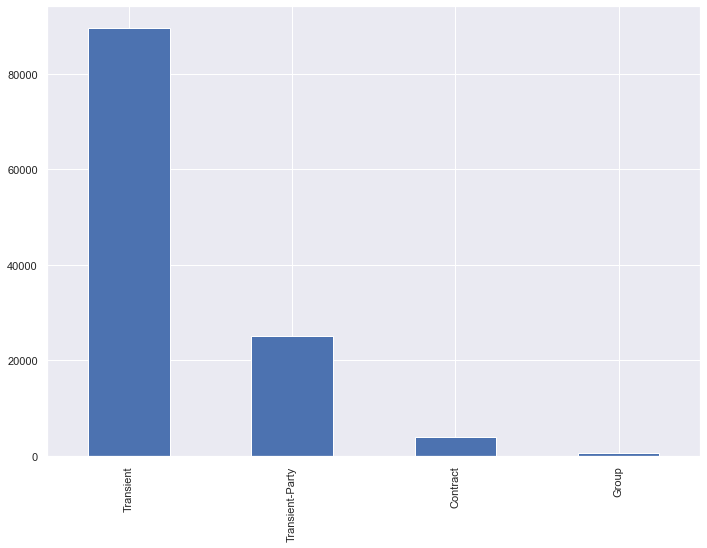

In [20]:
# Distribution 
data.customer_type.value_counts().plot(kind ="bar")

*customer_type* refers to the type of booking. Only 4 categories are possible. Most of the reservations are *transient* i.e. individuals/families traveling or *transient party* individual reservatiosn that are related. This variable does not need cleaning. 

### adr

In [21]:
# Summary statistics
data.adr.describe()

count    119390.000000
mean        101.831122
std          50.535790
min          -6.380000
25%          69.290000
50%          94.575000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

In [22]:
# Missing values 
data.adr.isna().sum()

0

<AxesSubplot:ylabel='Frequency'>

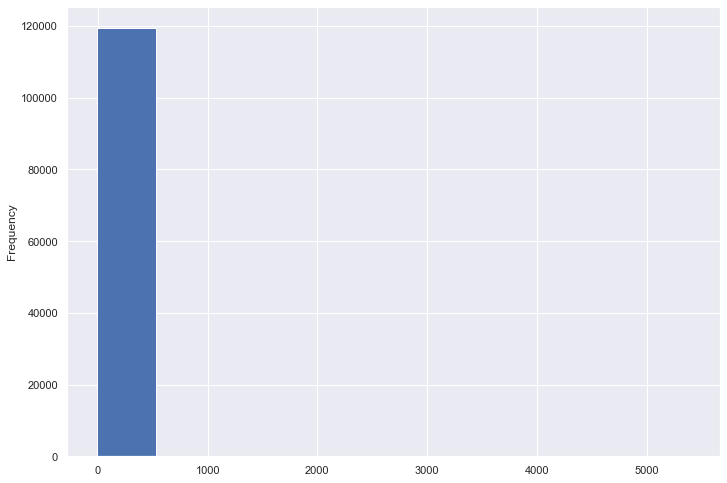

In [23]:
# distribution 
data.adr.plot(kind = "hist")

<AxesSubplot:>

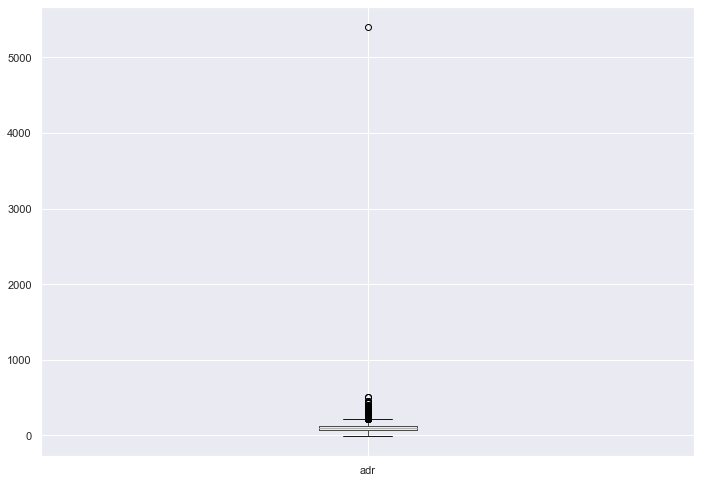

In [24]:
# Boxplot to look for outliers
data.boxplot("adr")

In [25]:
# number of reservations with negative price 
len(data.adr[data.adr < 0])

1

In [26]:
# number of reservations with price >1000
len(data.adr[data.adr > 1000])

1

In [27]:
# number of reservations with price greater than third quartile
len(data.adr[data.adr>126])

29184

<AxesSubplot:ylabel='Frequency'>

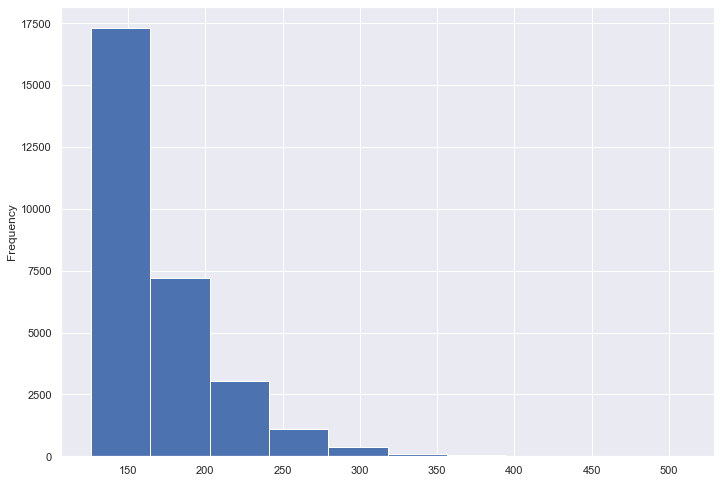

In [28]:
data[(data["adr"]>126) & (data["adr"]<5400)].adr.plot(kind = "hist")

*adr* is the average daily rate. There are two clear outliers: one room with negative value of -6.38 and one room with price $5,400. I suggest removing these two points. Additionally, there are several observations (29,184) with a price greater than the third quartile. We might want to keep these observations or just some of them. 

### required_car_parking_spaces 

In [29]:
# Summary statistics
data.required_car_parking_spaces.describe()

count    119390.000000
mean          0.062518
std           0.245291
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: required_car_parking_spaces, dtype: float64

In [30]:
# Missing values 
data.required_car_parking_spaces.isna().sum()

0

<AxesSubplot:ylabel='Frequency'>

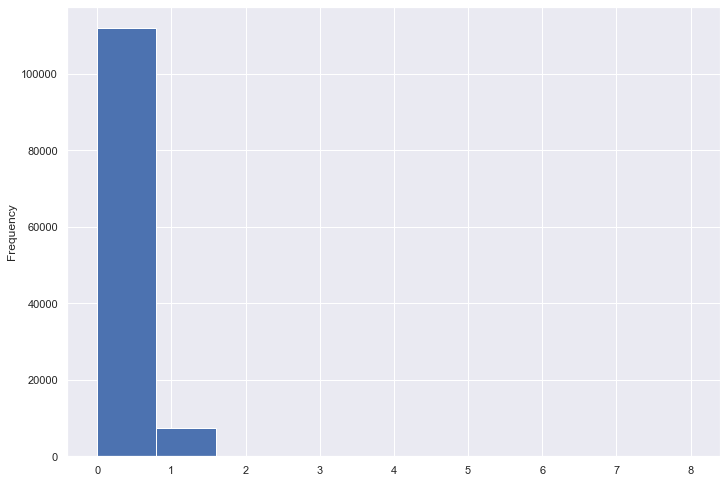

In [31]:
# Distribution 
data.required_car_parking_spaces.plot(kind = "hist")

In [32]:
data.required_car_parking_spaces.value_counts()

0    111974
1      7383
2        28
3         3
8         2
Name: required_car_parking_spaces, dtype: int64

In [33]:
data[data["required_car_parking_spaces"] == 8]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
29045,Resort Hotel,0,26,2017,March,11,14,0,5,2,...,No Deposit,NaN,NaN,0,Transient-Party,40.0,8,1,Check-Out,2017-03-19
29046,Resort Hotel,0,138,2017,March,12,19,2,2,2,...,No Deposit,NaN,NaN,122,Transient-Party,80.0,8,0,Check-Out,2017-03-23


Most reservations do not need a car. There are only two reservations that asked for 8 parking spaces, they were a "transient-party" reservation. None of these two were cancelations. It might be worth it to remove them. 

### total_of_special_requests

In [34]:
# summary statistics
data.total_of_special_requests.describe()

count    119390.000000
mean          0.571363
std           0.792798
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           5.000000
Name: total_of_special_requests, dtype: float64

In [35]:
# missing values 
data.total_of_special_requests.isna().sum()

0

In [37]:
# unique values
data.total_of_special_requests.value_counts()

0    70318
1    33226
2    12969
3     2497
4      340
5       40
Name: total_of_special_requests, dtype: int64

<AxesSubplot:ylabel='Frequency'>

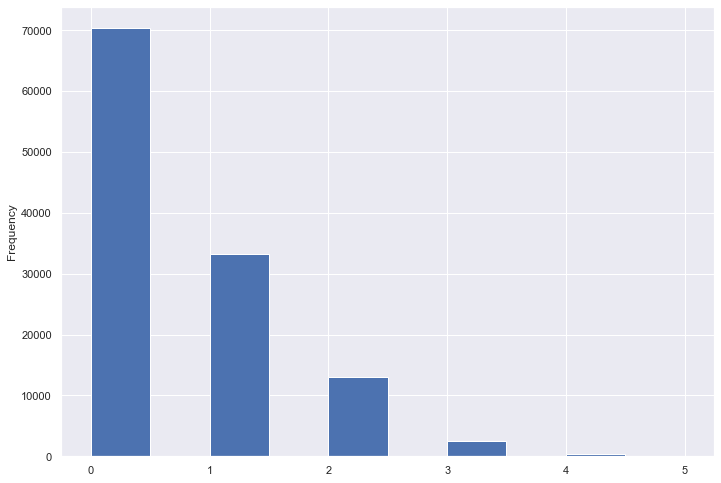

In [38]:
# distribution
data.total_of_special_requests.plot(kind = "hist")

*total_of_special_requests* goes from 0 to 5. The distribution is skewed towards zero but this feature does not need cleaning. 

### reservation_status

In [39]:
# summary statistics
data.reservation_status.describe()

count        119390
unique            3
top       Check-Out
freq          75166
Name: reservation_status, dtype: object

In [40]:
# missing values 
data.reservation_status.isna().sum()

0

In [43]:
# distribution
data.reservation_status.value_counts()

Check-Out    75166
Canceled     43017
No-Show       1207
Name: reservation_status, dtype: int64

In [47]:
# frequency table combined with is_canceled
data.groupby(["reservation_status", "is_canceled"]).size().reset_index(name = "Count")

,reservation_status,is_canceled,Count
0,Canceled,1,43017
1,Check-Out,0,75166
2,No-Show,1,1207


*reservation_status* is the last status of the reservation (canceled, check-out, no show). All "canceled" or "no-show" count towards "is_canceled". This variable alone does not tell anything. However combined with *reservationstatusdate* could be useful for some feature engineering.

### reservation_status_date

In [52]:
data.reservation_status_date.describe()

count         119390
unique           926
top       2015-10-21
freq            1461
Name: reservation_status_date, dtype: object

*reservation_status_date* is the date at which the last status was set. Can be used to get the number of days prior to the entry was the reservation canceled. 